In [2]:
!pip install sklearn

Processing /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074/sklearn-0.0-py2.py3-none-any.whl
     |████████████████████████████████| 22.3 MB 11.5 MB/s eta 0:00:01


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pylab as plt

# 실습 data: Cereals.csv

1. Name: Name of cereal
2. mfr: Manufacturer of cereal where A = American Home Food Products; G = General Mills; K = 
    Kelloggs; N = Nabisco; P = Post; Q = Quaker Oats; R = Ralston Purina
3. type: cold or hot
4. calories: calories per serving
5. protein: grams of protein
6. fat: grams of fat
7. sodium: milligrams of sodium
8. fiber: grams of dietary fiber
9. carbo: grams of complex carbohydrates
10. sugars: grams of sugars
11. potass: milligrams of potassium
12. vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA 
      recommended
13. shelf: display shelf (1, 2, or 3, counting from the floor)
14. weight: weight in ounces of one serving
15. cups: number of cups in one serving
16. __rating__: a rating of the cereals calculated by Consumer Reports

##### Q1) Data import

In [4]:
cereals_df = pd.read_csv("./data/Cereals.csv")
print(cereals_df.shape)
cereals_df.head()

(77, 16)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


##### simple EDA

In [5]:
cereals_df.mfr.value_counts()

K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: mfr, dtype: int64

In [6]:
cereals_df.type.value_counts()

C    74
H     3
Name: type, dtype: int64

In [7]:
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


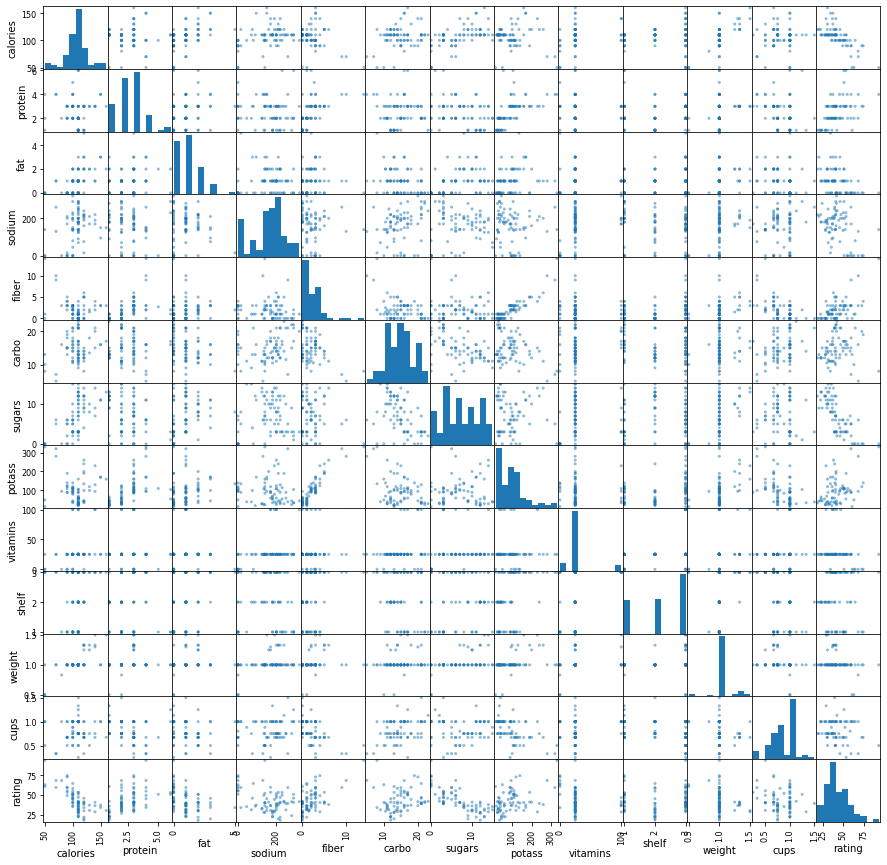

In [8]:
pd.plotting.scatter_matrix(cereals_df, figsize=(15, 15))
plt.show()

# Principal Component Analysis (PCA)

## Explore scikit learn PCA
자료: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html <br>
주로 사용하는 기능: fit_transform, fit, transform, explained_variance_, explained_variance_ratio_, components_

##### Import library

In [9]:
from sklearn.decomposition import PCA

##### PCA library 써보기

In [10]:
# PCA 적용해 볼 데이터
X = np.array([[-1, -1, 2], [-2, -1, 1], [-3, -2, 4], [1, 1, 1], [2, 1, 3], [3, 2, 2]])
X

array([[-1, -1,  2],
       [-2, -1,  1],
       [-3, -2,  4],
       [ 1,  1,  1],
       [ 2,  1,  3],
       [ 3,  2,  2]])

In [11]:
# 2차원으로 축소하는 PCA 객체 생성하기
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [12]:
# X를 차원 축소하는 모델 학습하기
pca.fit(X)

PCA(n_components=2)

In [13]:
# 각 주성분의 분산 확인하기
print(f"각 주성분으로 설명되는 분산 값: {pca.explained_variance_}")
print(f"각 주성분이 설명하는 분산이 전체 분산 중 차지하는 비율: {pca.explained_variance_ratio_}")

각 주성분으로 설명되는 분산 값: [8.04280248 1.2883496 ]
각 주성분이 설명하는 분산이 전체 분산 중 차지하는 비율: [0.85866219 0.13754622]


In [14]:
# 각 주성분의 구성 확인하기
pca.components_

array([[-0.83059082, -0.54302754,  0.12345031],
       [-0.1795935 ,  0.05136247, -0.98239914]])

In [15]:
# 차원 변환된 값 도출하기
pca.transform(X)

array([[ 1.35304331,  0.29196422],
       [ 2.06018382,  1.45395686],
       [ 3.80415311, -1.36500954],
       [-1.51764372,  1.0179013 ],
       [-2.10133393, -1.12649048],
       [-3.5984026 , -0.27232236]])

In [16]:
# 차원 축소 모델 학습 + 변환 한 번에 하기
pca.fit_transform(X)

array([[ 1.35304331,  0.29196422],
       [ 2.06018382,  1.45395686],
       [ 3.80415311, -1.36500954],
       [-1.51764372,  1.0179013 ],
       [-2.10133393, -1.12649048],
       [-3.5984026 , -0.27232236]])

## Practice with scikit learn PCA
- cereals 데이터를 이용
- 우선 categorical data는 변수로 사용하지 않고 PCA를 수행
- null 값이 하나라도 있는 경우도 그냥 제거하고 수행

##### 데이터 확인

In [17]:
print(cereals_df.shape)
cereals_df.head()

(77, 16)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


우리가 사용할 변수는 calories ~ cups 까지, 총 12개의 변수

##### calories ~ cups까지의 변수만으로 이루어진 dataframe을 pca_test_df라는 이름으로 저장하시오.

In [18]:
pca_test_df = cereals_df.loc[:, 'calories':'cups']
pca_test_df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75


##### 하나라도 null 값을 갖는 column이 있는 row는 제거

In [19]:
print("Before dropna: ", pca_test_df.shape)
pca_test_df.dropna(inplace=True)
print("After dropna: ", pca_test_df.shape)

Before dropna:  (77, 12)
After dropna:  (74, 12)


##### 데이터를 standardize 하고 X에 저장

In [20]:
X = preprocessing.scale(pca_test_df)
print(X)

[[-1.87865227  1.3911796   0.         -0.39369182  3.25070642 -2.51720557
  -0.25594026  2.57800107 -0.18308346  0.94840141 -0.20220332 -2.09989497]
 [ 0.65821393  0.45529514  4.         -1.79257173 -0.0729865  -1.74106718
   0.2060007   0.51828763 -1.31209813  0.94840141 -0.20220332  0.76191901]
 [-1.87865227  1.3911796   0.          1.18765068  2.8352448  -1.99977998
  -0.48691074  3.14619788 -0.18308346  0.94840141 -0.20220332 -2.09989497]
 [-2.89339875  1.3911796  -1.         -0.27205009  4.91255287 -1.74106718
  -1.64176313  3.28824708 -0.18308346  0.94840141 -0.20220332 -1.37376306]
 [ 0.15084069 -0.48058932  1.          0.21451684 -0.28071731 -1.0942852
   0.66794165 -0.40503219 -0.18308346 -1.47165737 -0.20220332 -0.30592203]
 [ 0.15084069 -0.48058932 -1.         -0.45451268 -0.48844811 -0.9649288
   1.59182357 -0.973229   -0.18308346 -0.26162798 -0.20220332  0.76191901]
 [ 1.16558717  0.45529514  1.          0.57944203 -0.0729865   0.84606076
   0.2060007   0.02111542 -0.18308

##### Q1) 12차원으로 차원을 변경하는 PCA 객체를 생성하시오.
- 동일한 12차원이지만, 데이터를 잘 설명할 수 있는 12개의 차원으로 변환

In [21]:
pca = PCA(n_components=12)
pca

PCA(n_components=12)

##### Q2) 차원을 변경하는 모델을 학습하시오.

In [22]:
pca.fit(X)

PCA(n_components=12)

##### Q3) 각 주성분의 분산을 확인해보시오.

In [23]:
pca.explained_variance_

array([3.36484971, 2.68343251, 1.81049205, 1.0315095 , 0.99776211,
       0.69922773, 0.66888458, 0.42176628, 0.31802842, 0.09305466,
       0.05706436, 0.01831167])

In [24]:
pca.explained_variance_ratio_

array([0.2766149 , 0.22059749, 0.1488355 , 0.08479752, 0.08202324,
       0.05748156, 0.05498713, 0.03467223, 0.02614423, 0.00764976,
       0.0046911 , 0.00150535])

In [25]:
# 각 주성분이 설명하는 분산 크기들
variances = pca.explained_variance_

# 각 주성분이 설명하는 분산이 전체 분산 중 차지하는 비율들
var_ratios = pca.explained_variance_ratio_

pc_info_df = pd.DataFrame(data={"VAR": variances, "VAR_RATIO": var_ratios, 
                                "VAR_RATIO_CUMSUM": np.cumsum(var_ratios)}, 
                          index=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", 
                                 "PC7", "PC8", "PC9", "PC10", "PC11", "PC12"])
pc_info_df

,VAR,VAR_RATIO,VAR_RATIO_CUMSUM
PC1,3.364850,0.276615,0.276615
PC2,2.683433,0.220597,0.497212
PC3,1.810492,0.148835,0.646048
PC4,1.031509,0.084798,0.730845
PC5,0.997762,0.082023,0.812869
PC6,0.699228,0.057482,0.870350
PC7,0.668885,0.054987,0.925337
PC8,0.421766,0.034672,0.960010
PC9,0.318028,0.026144,0.986154
PC10,0.093055,0.007650,0.993804


PCA를 통해 변환한 변수를 이용하면, 3~4개의 변수만으로도 기존 12개의 변수에서 발생하는 분산을 거의 모두 설명할 수 있음을 알 수 있다. PCA를 통해 1차원, 2차원, 3차원, 4차원, 5차원으로 차원을 축소하여 모델을 학습했을 때 결과가 어떻게 다른지 비교해보자.

##### Q4) pca_test_df를 1차원으로 축소하고 축소된 변수를 X1_pca이라는 이름의 array에 저장하시오.

In [26]:
pca = PCA(n_components=1)
X1_pca = pca.fit_transform(X)
X1_pca

array([[ 4.87039945],
       [ 1.76110972],
       [ 4.72716085],
       [ 5.14281386],
       [-0.33239365],
       [-1.08631448],
       [ 1.05103874],
       [ 0.01343138],
       [ 1.62677028],
       [-0.87675824],
       [-0.23031164],
       [-0.71254756],
       [ 1.26099089],
       [-1.31784495],
       [-2.75365372],
       [-2.46579427],
       [-1.62231928],
       [-1.24645059],
       [ 2.45576714],
       [-1.67315163],
       [ 0.62637681],
       [-0.6737429 ],
       [-0.89257593],
       [-1.720504  ],
       [ 0.13993476],
       [ 2.79537914],
       [ 2.28301019],
       [-1.19613906],
       [-1.33926442],
       [-1.33853265],
       [ 0.29859484],
       [ 0.94389181],
       [ 1.90026577],
       [-1.02996694],
       [-0.20530921],
       [-2.74676149],
       [-0.81725781],
       [ 0.73912465],
       [-2.77099207],
       [ 0.88187367],
       [-1.02698256],
       [-0.47645478],
       [ 1.61403873],
       [ 1.57998937],
       [ 2.34006566],
       [-1

##### Q5) 마찬가지 방식으로 2차원 ~ 5차원으로 축소하고, 축소된 변수를 각각 X2_pca ~ X5_pca이라는 이름의 array에 저장하시오.

In [27]:
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X)

pca = PCA(n_components=3)
X3_pca = pca.fit_transform(X)

pca = PCA(n_components=4)
X4_pca = pca.fit_transform(X)

pca = PCA(n_components=5)
X5_pca = pca.fit_transform(X)

##### 축소한 데이터를 이용하여 linear regression 모델을 학습하고 비교해보자.

In [33]:
# linear regression library
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.model_selection import train_test_split

def rl_test(X, y):
    lr = LinearRegression()
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
    lr.fit(train_X, train_y)
    y_hat = lr.predict(test_X)
    rmse = ((test_y-y_hat)**2).mean()**0.5
    return rmse

In [39]:
cases = ['1차원축소', '2차원축소', '3차원축소', '4차원축소', '5차원축소']
Xs = [X1_pca, X2_pca, X3_pca, X4_pca, X5_pca]
y = cereals_df.dropna()['rating'].values

for i in range(5):
    rmse = rl_test(Xs[i], y)
    print(f"{cases[i]}: {rmse:.3f}")

1차원축소: 12.607
2차원축소: 7.947
3차원축소: 4.880
4차원축소: 4.811
5차원축소: 4.618


##### Q5) 3차원으로 축소한다고 할 때, 주요한 영향을 주는 변수는 무엇일지 파악해보시오.

In [40]:
# numpy array 안의 소수 표현 방식 설정
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [41]:
pca = PCA(n_components=3)
pca.fit(X)
pca.components_

array([[0.0366, 0.3309, 0.2125, -0.0509, 0.4586, -0.2686, 0.0814, 0.5026,
        0.0188, 0.3089, 0.2572, -0.3712],
       [-0.5711, 0.0454, -0.2491, -0.3047, 0.2010, -0.1757, -0.3648,
        0.0703, -0.3006, -0.0651, -0.4490, -0.1066],
       [-0.0779, 0.3264, -0.2913, 0.3431, 0.1739, 0.5130, -0.4953,
        0.1305, 0.3276, 0.0005, 0.1220, 0.0827]])

In [42]:
pd.DataFrame(pca.components_, columns=cereals_df.columns[3:-1], 
             index=["PC1", "PC2", "PC3"])

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
PC1,0.036594,0.330888,0.212549,-0.050894,0.458623,-0.268609,0.081440,0.502603,0.018839,0.308929,0.257160,-0.371154
PC2,-0.571142,0.045367,-0.249143,-0.304684,0.201029,-0.175660,-0.364844,0.070345,-0.300574,-0.065114,-0.448962,-0.106553
PC3,-0.077927,0.326405,-0.291274,0.343108,0.173912,0.513002,-0.495338,0.130460,0.327563,0.000546,0.122030,0.082695


/root/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

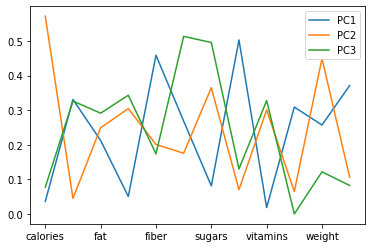

In [44]:
df_tmp = pd.DataFrame(pca.components_, columns=cereals_df.columns[3:-1], 
                      index=["PC1", "PC2", "PC3"])
df_tmp.apply(lambda x: abs(x)).T.plot()

## Visualization
- 2차원으로 축소하여 data point를 시각화

In [ ]:
# 필요한 경우 install
!pip install adjustText

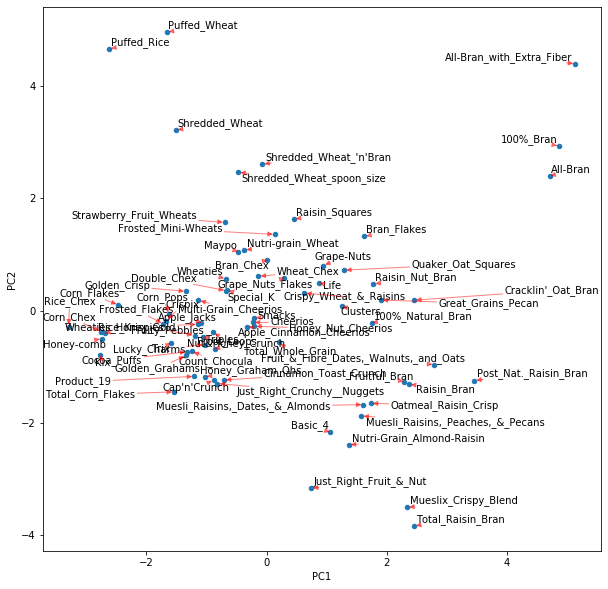

In [100]:
from adjustText import adjust_text

points = pd.DataFrame({"PC1":X2_pca[:, 0], "PC2":X2_pca[:, 1], 
                       'name': cereals_df.dropna().name.values})
ax = points.plot.scatter(x='PC1', y='PC2', figsize=(10, 10))

texts = []
for _, (x, y, s) in points.iterrows():
    texts.append(ax.text(x, y, s))
adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='r', alpha=0.5))
plt.show()